In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
file = 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv'
df = pd.read_csv(file)

In [3]:
pd.set_option("display.max_columns", df.shape[1])
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


### Creat a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

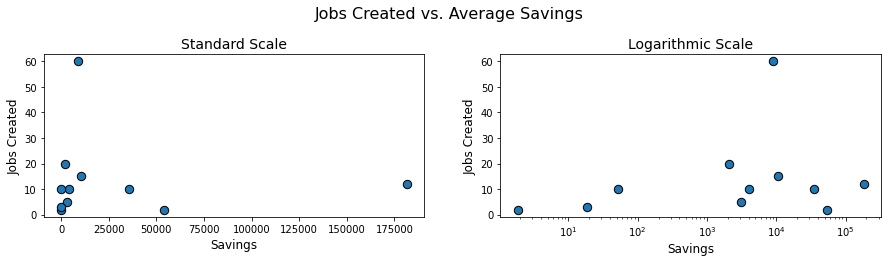

In [61]:
fig, axes = plt.subplots(1,2, figsize = (15, 3)) 
axes[0].scatter(df['Total Savings'], df['Job created'], s = 70, edgecolor = 'k')
axes[0].set_xlabel('Savings', fontsize=12)
axes[0].set_ylabel('Jobs Created', fontsize=12)
axes[0].set_title('Standard Scale', fontsize=14)

axes[1].scatter(df['Total Savings'], df['Job created'], s = 70, edgecolor = 'k')
axes[1].set_xscale('log')
axes[1].set_xlabel('Savings', fontsize=12)
axes[1].set_ylabel('Jobs Created', fontsize=12)
axes[1].set_title('Logarithmic Scale', fontsize=14)

fig.suptitle('Jobs Created vs. Average Savings', fontsize=16, y=1.1);

### Creat a histogram of the log of the average total savings.

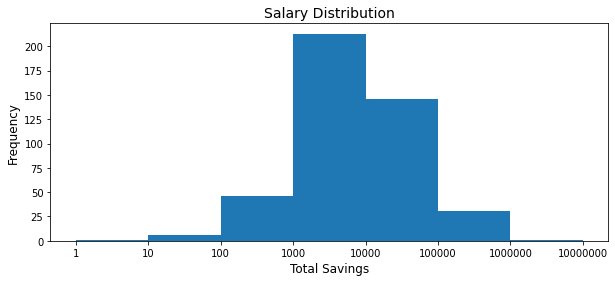

In [151]:
fig, ax = plt.subplots(1,1, figsize = (10, 4))
df_filt= df[df['Total Savings']>0] # drop zeros, log of zero is inf

Ceil = np.ceil(np.log10(df_filt['Total Savings'].max())) # logarithmic salary range
logbins = np.arange(Ceil+1)
h, bins, patches = ax.hist(df_filt['Total Savings'].apply(np.log10), bins=logbins)
#ax.set_xticks(bins, ['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$']);
ax.set_xticks(bins,(10**(bins)).astype(int).astype(str));
#ax.set_xticks(bins,['$'+'10^{}'.format(i.astype(int))+'$' + '\$' for i in bins]);


ax.set_xlabel('Total Savings', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Salary Distribution', fontsize=14);


### Creat a line plot of the total jobs created for each month.

In [223]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df['Month'] = df['Effective Date'].dt.month
#df['Month_Name'] = df['Effective Date'].dt.month_name()

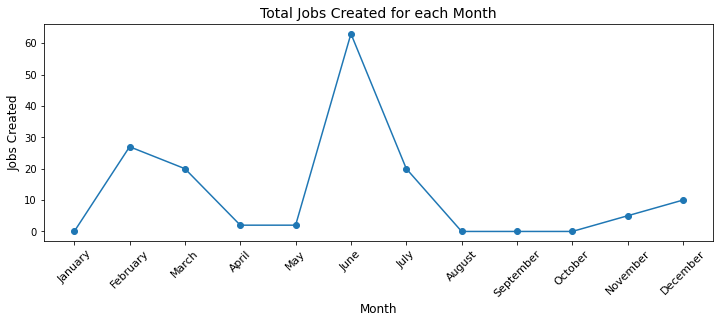

In [252]:
Month_Job = df.groupby(['Month'])['Job created'].sum().to_frame('sum')

fig, ax = plt.subplots(1,1, figsize = (12, 4))
ax.plot(Month_Job, 'o-')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Jobs Created', fontsize=12)
ax.set_title('Total Jobs Created for each Month', fontsize=14)

Month_names = pd.to_datetime(np.arange(1,13), format='%m').month_name()
ax.set_xticks(np.arange(1,13), Month_names, fontsize=11)
ax.tick_params(axis='x', labelrotation = 45)
